# Dashboard Application with Plotly Dash

### TASK 1: Add a Launch Site Drop-down Input Component

In [ ]:
#set a list of launch sites for dropdown
sites = []
for site in spacex_df['Launch Site'].unique():
    dict = {}
    dict['label'] = site
    dict['value'] = site
    sites.append(dict)

In [ ]:
#add a dropdown
dcc.Dropdown(
                id='site-dropdown',
                options=sites,
                value='ALL',
                placeholder="Select a Launch Site here",
                searchable=True
            ),

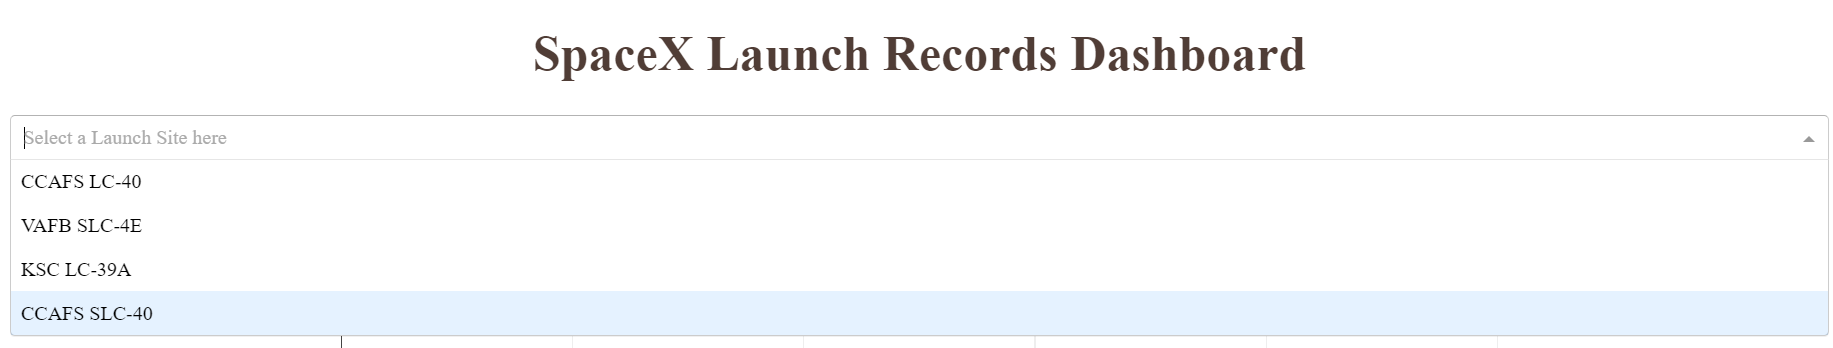

### TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

In [ ]:
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        filtered_df = spacex_df[spacex_df['class'] == 1]
        fig = px.pie(filtered_df, values='class', names='Launch Site', title='Total success launches by site')
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.pie(filtered_df, values=filtered_df['class'].value_counts().values, names=filtered_df['class'].value_counts().index, title='Total success launches by site '+str(entered_site))
        return fig

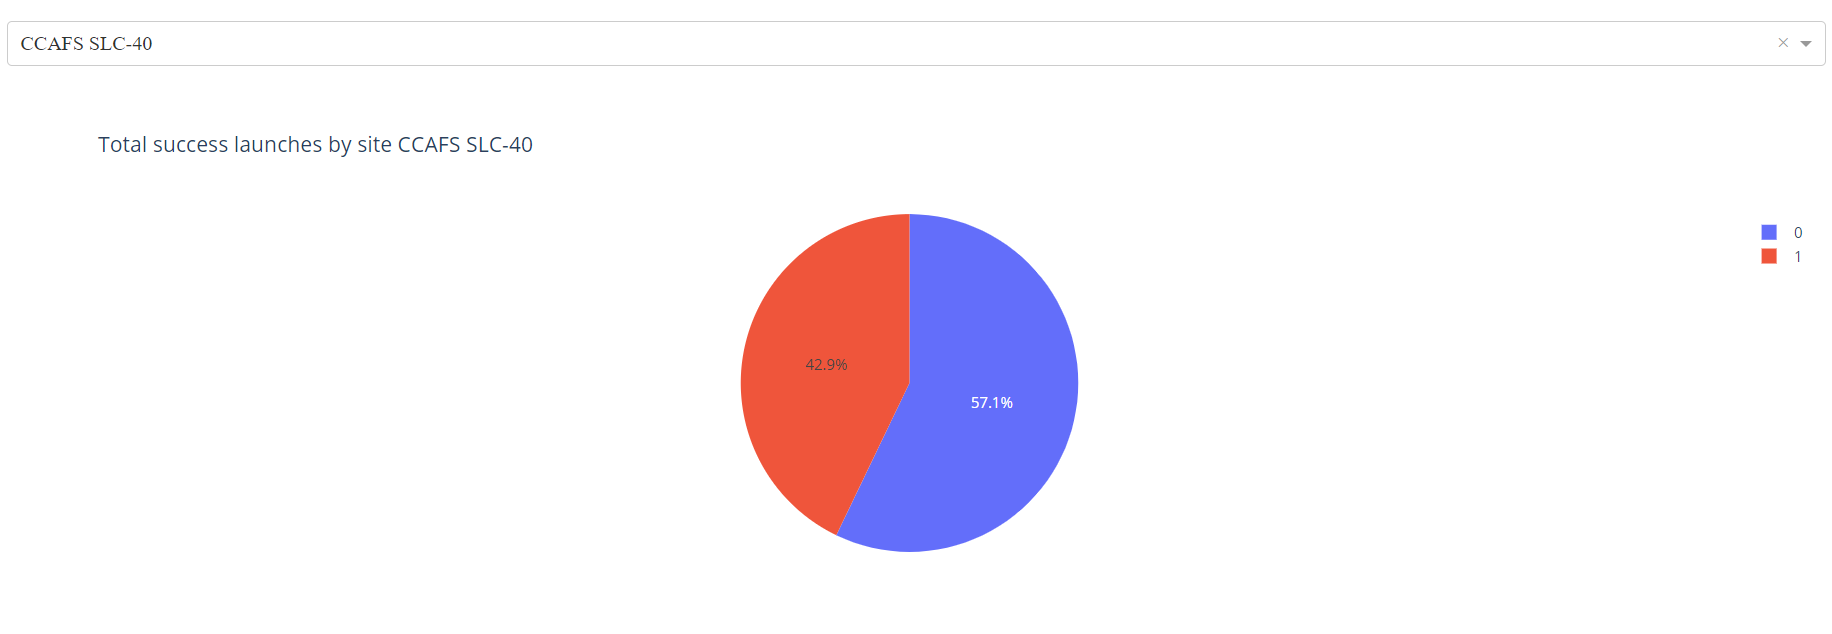

### TASK 3: Add a Range Slider to Select Payload

In [ ]:
dcc.RangeSlider(id='payload-slider',
                min=0, max=10000, step=1000,
                marks={0: '0',1000: '1000', 2000: '2000', 3000:'3000',4000: '4000', 5000: '5000', 6000:'6000', 7000: '7000', 8000: '8000', 9000:'9000', 10000:'10000'},
                value=[min_payload, max_payload])

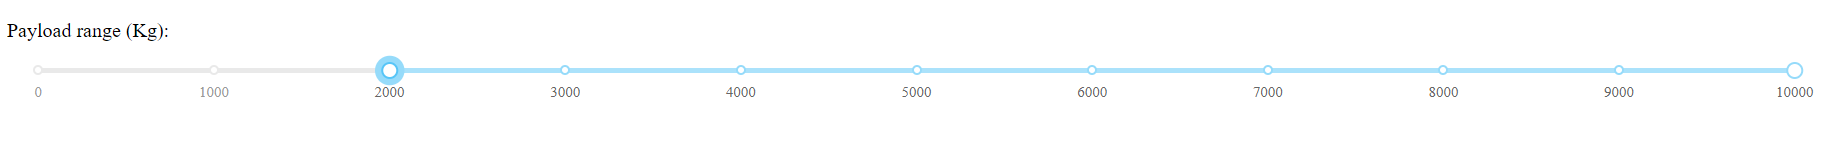

### TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

In [ ]:
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), 
              Input(component_id="payload-slider", component_property="value")])
def get_scatter_chart(entered_site, payload_range):
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= payload_range[0]) & (spacex_df['Payload Mass (kg)'] <= payload_range[1])]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color="Booster Version Category")
        return fig
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color="Booster Version Category")
        return fig

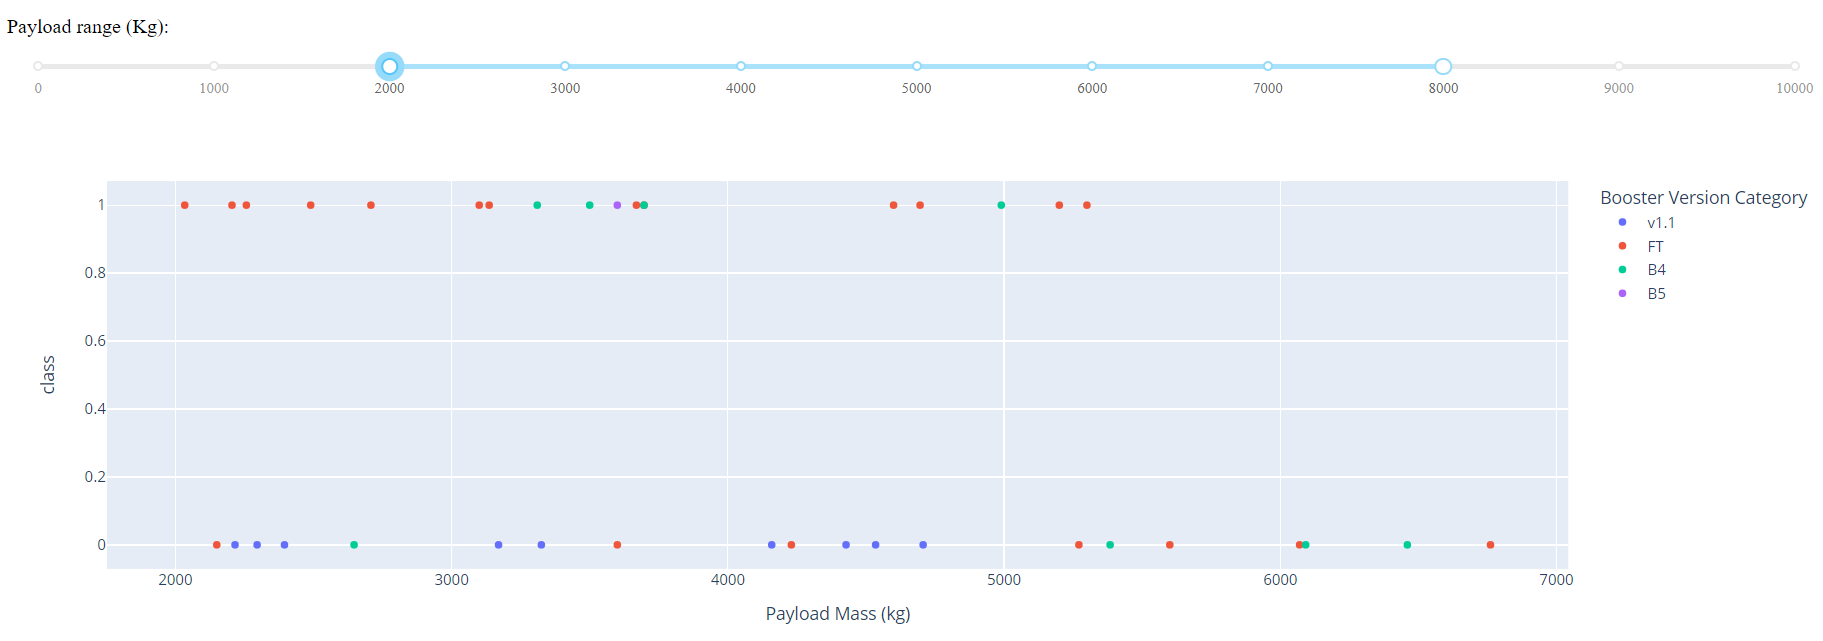

# Whole project

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

sites = []
for site in spacex_df['Launch Site'].unique():
    dict = {}
    dict['label'] = site
    dict['value'] = site
    sites.append(dict)


# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                dcc.Dropdown(id='site-dropdown',
                                        options=sites,
                                        value='ALL',
                                        placeholder="Select a Launch Site here",
                                        searchable=True
                                ),
                                html.Br(),

                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0',1000: '1000', 2000: '2000', 3000:'3000',4000: '4000', 5000: '5000', 6000:'6000', 7000: '7000', 8000: '8000', 9000:'9000', 10000:'10000'},
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        filtered_df = spacex_df[spacex_df['class'] == 1]
        fig = px.pie(filtered_df, values='class', names='Launch Site', title='Total success launches by site')
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.pie(filtered_df, values=filtered_df['class'].value_counts().values, names=filtered_df['class'].value_counts().index, title='Total success launches by site '+str(entered_site))
        return fig

@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), 
              Input(component_id="payload-slider", component_property="value")])
def get_scatter_chart(entered_site, payload_range):
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= payload_range[0]) & (spacex_df['Payload Mass (kg)'] <= payload_range[1])]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color="Booster Version Category")
        return fig
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color="Booster Version Category")
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()

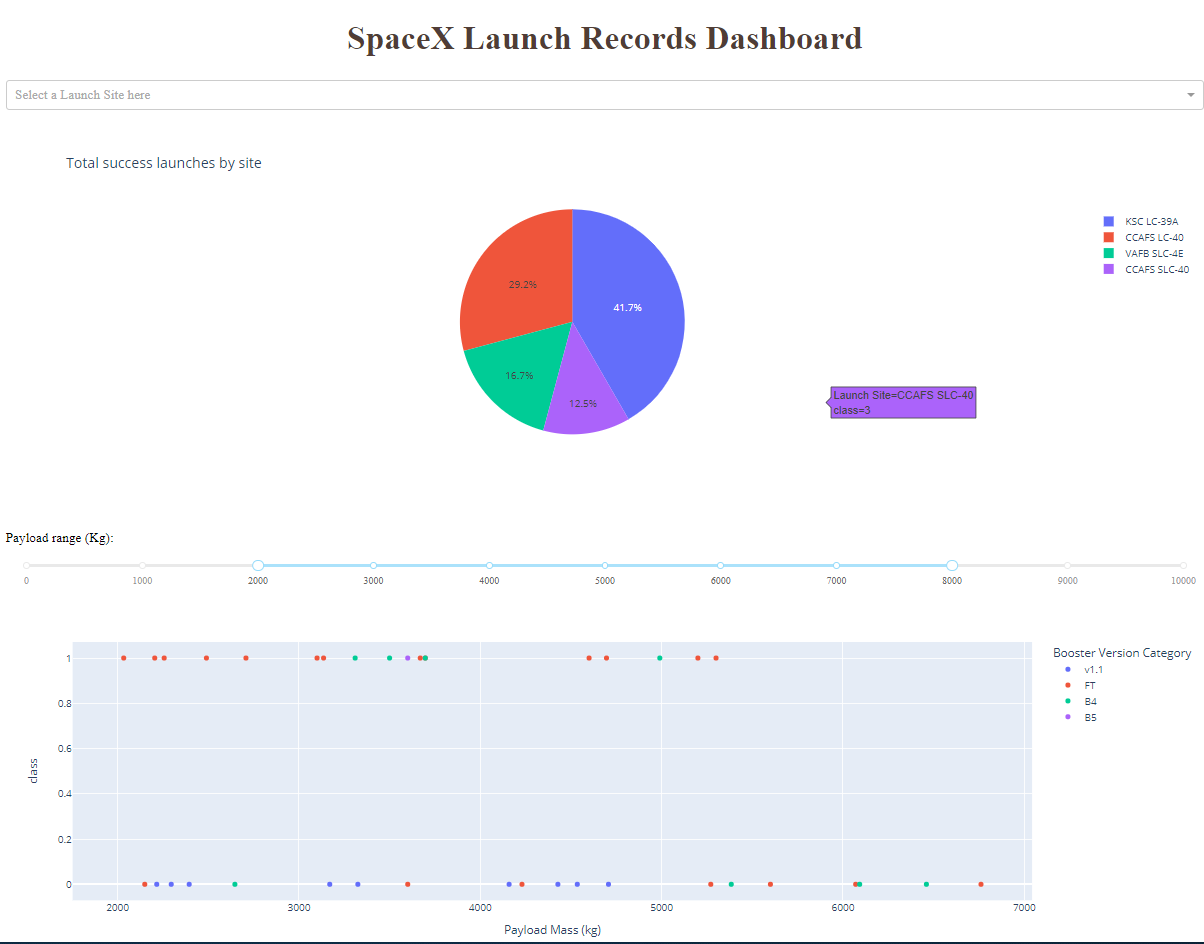